# This is the EDA and the Model identification 

## Objective
Find a model to predict BTC price using SP500 price history.

### Input Data
Data is downloaded from investing.com

In [523]:
# !conda info

In [524]:

# Set display options for better visualization in Jupyter notebook
import pandas as pd
import numpy as np
import seaborn as sns

# Load Data sets

In [525]:
df_btc_usd = pd.read_csv("./input/data/20241223_Bitcoin Historical Data.csv")
df_sp500 = pd.read_csv("./input/data/20241223_S&P 500 Historical Data.csv")

In [526]:
df_btc_usd.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/23/2024,"95,998.0","95,184.8","96,487.5","93,751.2",110.55K,0.86%
1,12/22/2024,"95,183.8","97,281.6","97,422.2","94,265.2",100.64K,-2.13%
2,12/21/2024,"97,253.3","97,799.1","99,531.9","96,478.6",123.36K,-0.55%
3,12/20/2024,"97,795.7","97,468.3","98,178.2","92,301.9",221.18K,0.34%
4,12/19/2024,"97,466.1","100,190.5","102,778.8","95,672.2",200.57K,-2.73%


In [527]:
df_sp500.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/20/2024,"5,930.85","5,842.00","5,982.06","5,832.30",0.00K,1.09%
1,12/19/2024,"5,867.08","5,912.71","5,935.52","5,866.07",0.00K,-0.09%
2,12/18/2024,"5,872.16","6,047.65","6,070.67","5,867.79",0.00K,-2.95%
3,12/17/2024,"6,050.61","6,052.55","6,057.68","6,035.19",0.00K,-0.39%
4,12/16/2024,"6,074.08","6,063.79","6,085.19","6,059.14",0.00K,0.38%


In [528]:
from pandas import DataFrame

cols_to_keep = ['Price', 'Date']
# Filter cols
df_btc_usd = df_btc_usd[cols_to_keep]
df_sp500 = df_sp500[cols_to_keep]

def usd_to_float(df_usd_str: DataFrame, col_name: str) -> DataFrame:
    """
    Convert money str to float
    """
    return pd.to_numeric(df_usd_str[col_name].str.replace(',', ''), errors='coerce')


df_btc_usd['Price'] = usd_to_float(df_btc_usd, 'Price')
df_sp500['Price'] = usd_to_float(df_sp500, 'Price')

# Convert Date to DateTime 
df_btc_usd['Date'] = pd.to_datetime(df_btc_usd['Date'])
df_sp500['Date'] = pd.to_datetime(df_sp500['Date'])

# Assuming df1 and df2 are your DataFrames
print("df_btc_usd:")
print(df_btc_usd.dtypes)
print(df_btc_usd.head())

print("df_sp500:")
print(df_sp500.dtypes)
print(df_sp500.head())


df_btc_usd:
Price           float64
Date     datetime64[ns]
dtype: object
     Price       Date
0  95998.0 2024-12-23
1  95183.8 2024-12-22
2  97253.3 2024-12-21
3  97795.7 2024-12-20
4  97466.1 2024-12-19
df_sp500:
Price           float64
Date     datetime64[ns]
dtype: object
     Price       Date
0  5930.85 2024-12-20
1  5867.08 2024-12-19
2  5872.16 2024-12-18
3  6050.61 2024-12-17
4  6074.08 2024-12-16


In [529]:
# Join data by date
df_sp500.rename(columns={'Price': 'sp500_price'}, inplace=True)
df_btc_usd.rename(columns={'Price': 'btc_price'}, inplace=True)

df_btc_sp500 = pd.merge(df_btc_usd, df_sp500, on='Date', how='inner')
df_btc_sp500 = df_btc_sp500.sort_values(by='Date', ascending=True)
df_btc_sp500.head()

,btc_price,Date,sp500_price
1251,6967.0,2020-01-02,3257.8
1250,7343.1,2020-01-03,3234.8
1249,7759.1,2020-01-06,3246.3
1248,8155.7,2020-01-07,3237.2
1247,8059.6,2020-01-08,3253.1


In [530]:
# df_btc_sp500 = df_btc_sp500.iloc[::-1].reset_index(drop=True)
# df_btc_sp500.head()

## Plot

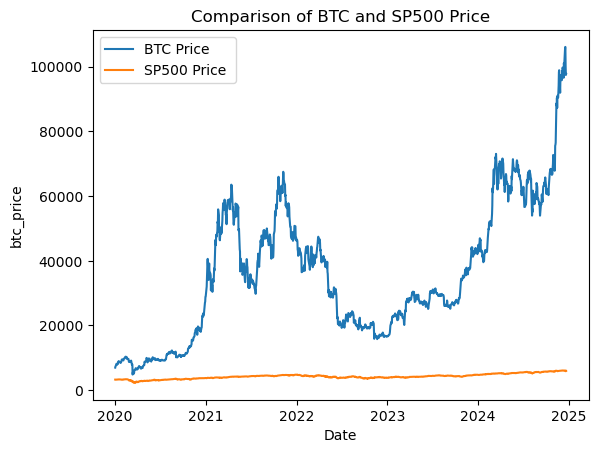

In [531]:
import matplotlib.pyplot as plt

sns.lineplot(data=df_btc_sp500, x='Date', y='btc_price', label='BTC Price')
sns.lineplot(data=df_btc_sp500, x='Date', y='sp500_price', label='SP500 Price ')  
plt.title("Comparison of BTC and SP500 Price")                 
plt.show()


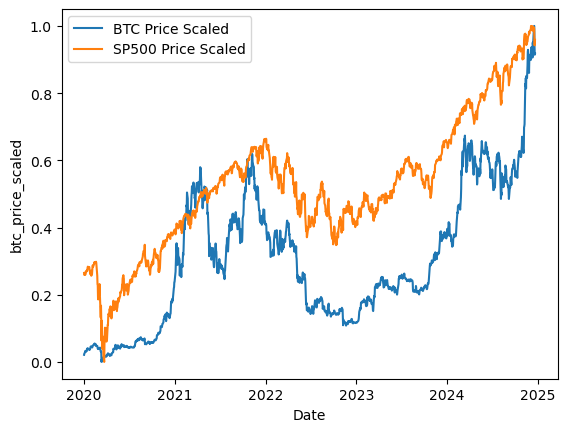

In [532]:
from sklearn.preprocessing import MinMaxScaler

scaler_btc = MinMaxScaler()
scaler_sp500 = MinMaxScaler()

btc_price = df_btc_sp500['btc_price'].values.reshape(-1, 1)
sp500_price = df_btc_sp500['sp500_price'].values.reshape(-1, 1)

btc_price_scaled = scaler_btc.fit_transform(btc_price)
sp500_price_scaled = scaler_sp500.fit_transform(sp500_price)

df_btc_sp500['btc_price_scaled'] = btc_price_scaled
df_btc_sp500['sp500_price_scaled'] = sp500_price_scaled

sns.lineplot(data=df_btc_sp500, x='Date', y='btc_price_scaled', label='BTC Price Scaled')
sns.lineplot(data=df_btc_sp500, x='Date', y='sp500_price_scaled', label='SP500 Price Scaled')  

plt.show()

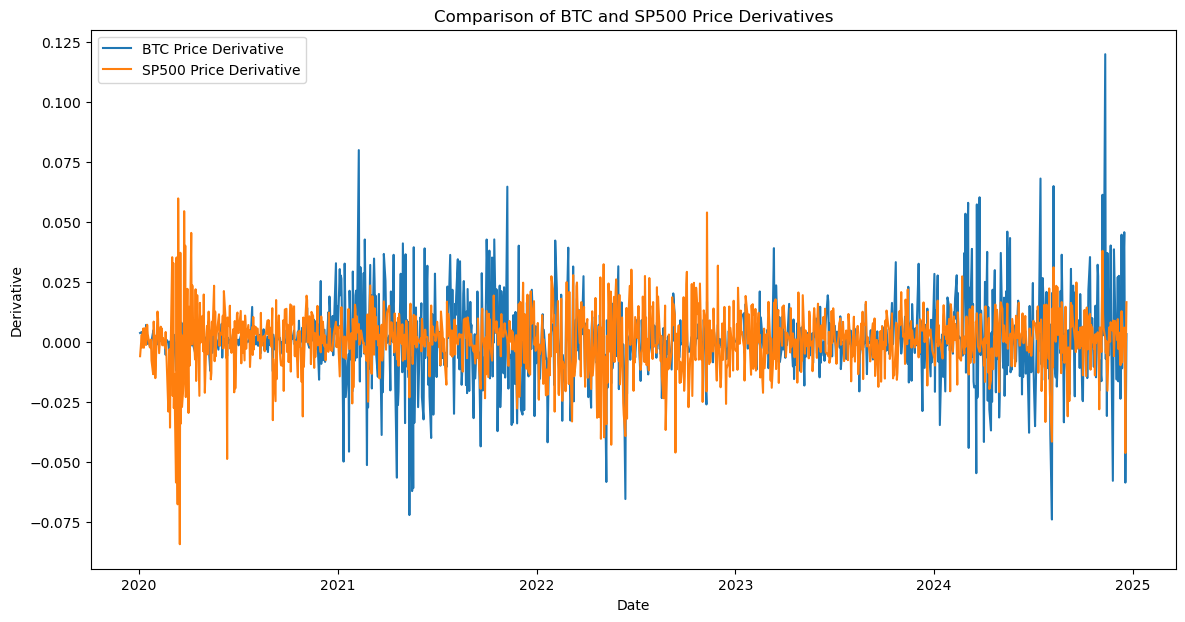

In [533]:
# Calculate the derivatives
df_btc_sp500['btc_price_derivative'] = df_btc_sp500['btc_price_scaled'].diff()
df_btc_sp500['sp500_price_derivative'] = df_btc_sp500['sp500_price_scaled'].diff()

# Drop the first row with NaN values due to the diff() operation
df_btc_sp500.dropna(inplace=True)

# Plot the derivatives
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_btc_sp500, x='Date', y='btc_price_derivative', label='BTC Price Derivative')
sns.lineplot(data=df_btc_sp500, x='Date', y='sp500_price_derivative', label='SP500 Price Derivative')

plt.xlabel("Date")
plt.ylabel("Derivative")
plt.title("Comparison of BTC and SP500 Price Derivatives")
plt.legend()
plt.show()

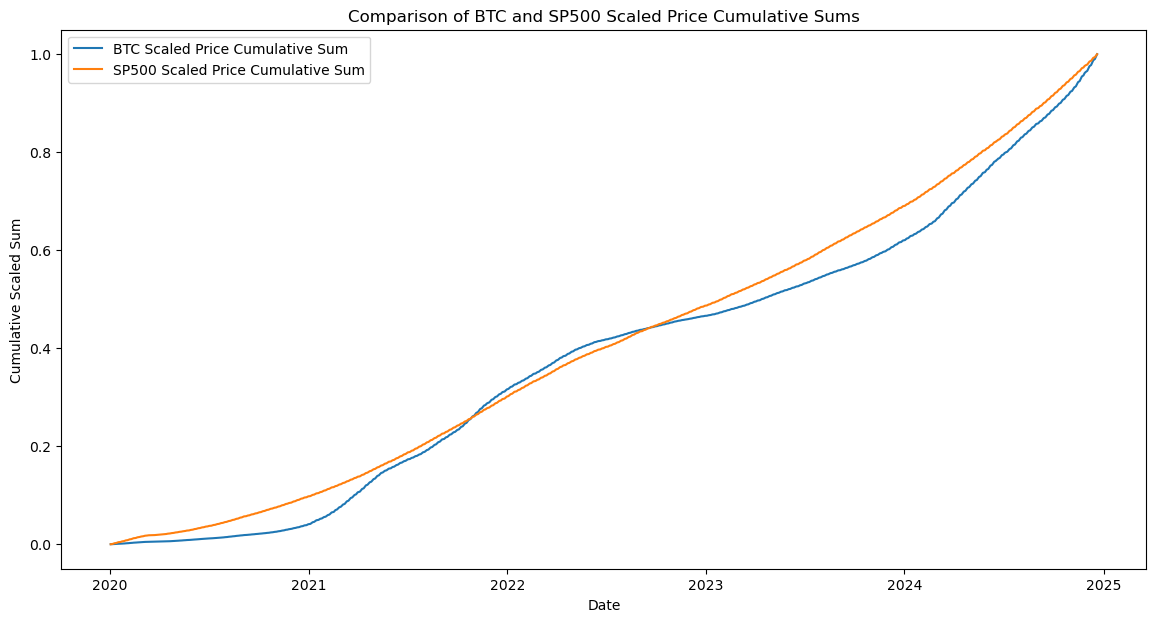

In [534]:
# Calculate the cumulative sum (integration) of the scaled prices
df_btc_sp500['btc_price_cumsum'] = df_btc_sp500['btc_price_scaled'].cumsum()
df_btc_sp500['sp500_price_cumsum'] = df_btc_sp500['sp500_price_scaled'].cumsum()

scaler_btc_price_cumsum = MinMaxScaler()
scaler_sp500_price_cumsum = MinMaxScaler()

btc_price_cumsum = df_btc_sp500['btc_price_cumsum'].values.reshape(-1, 1)
sp500_price_cumsum = df_btc_sp500['sp500_price_cumsum'].values.reshape(-1, 1)

btc_price_cumsum_scaled = scaler_btc.fit_transform(btc_price_cumsum)
sp500_price_cumsum_scaled = scaler_sp500.fit_transform(sp500_price_cumsum)

df_btc_sp500['btc_price_cumsum_scaled'] = btc_price_cumsum_scaled
df_btc_sp500['sp500_price_cumsum_scaled'] = sp500_price_cumsum_scaled

# Plot the cumulative sums
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_btc_sp500, x='Date', y='btc_price_cumsum_scaled', label='BTC Scaled Price Cumulative Sum')
sns.lineplot(data=df_btc_sp500, x='Date', y='sp500_price_cumsum_scaled', label='SP500 Scaled Price Cumulative Sum')

plt.xlabel("Date")
plt.ylabel("Cumulative Scaled Sum")
plt.title("Comparison of BTC and SP500 Scaled Price Cumulative Sums")
plt.legend()
plt.show()

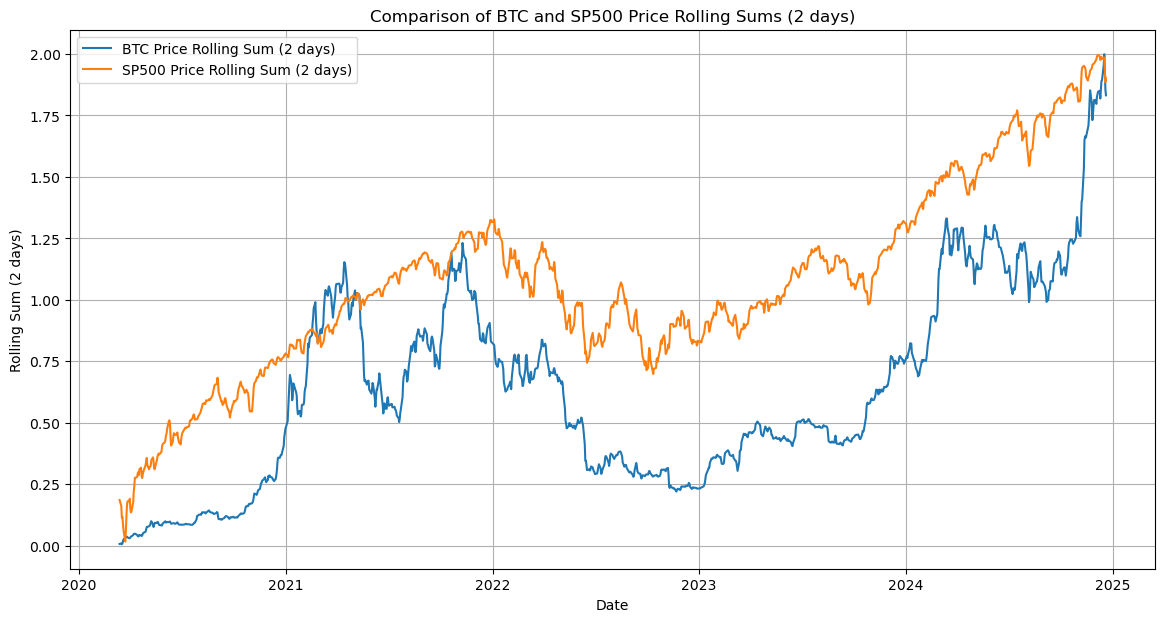

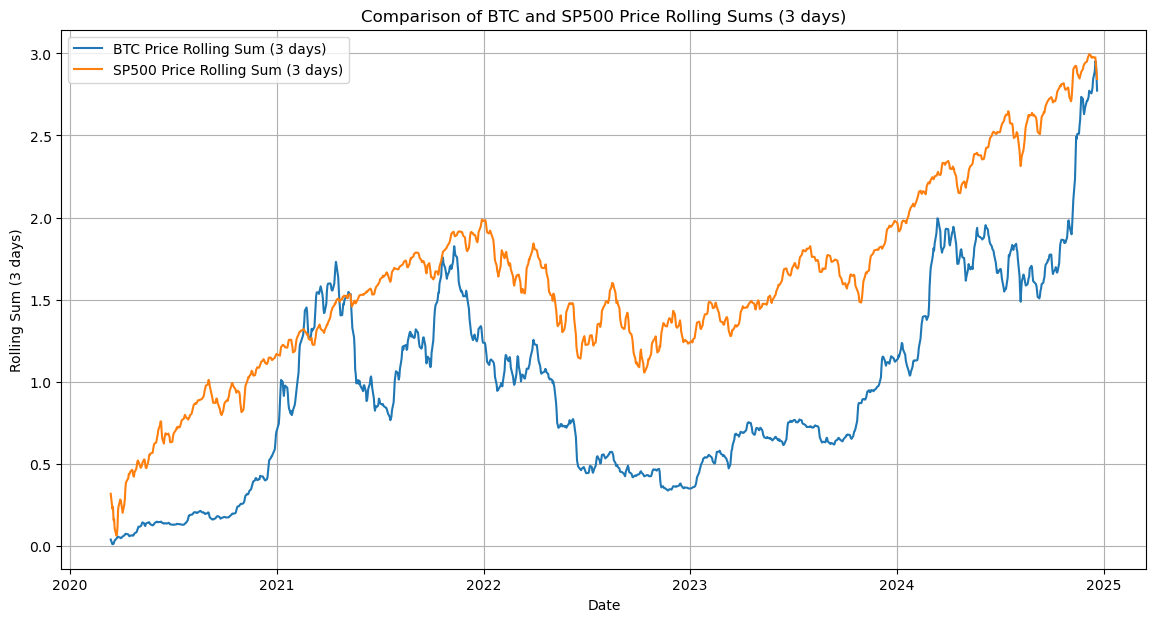

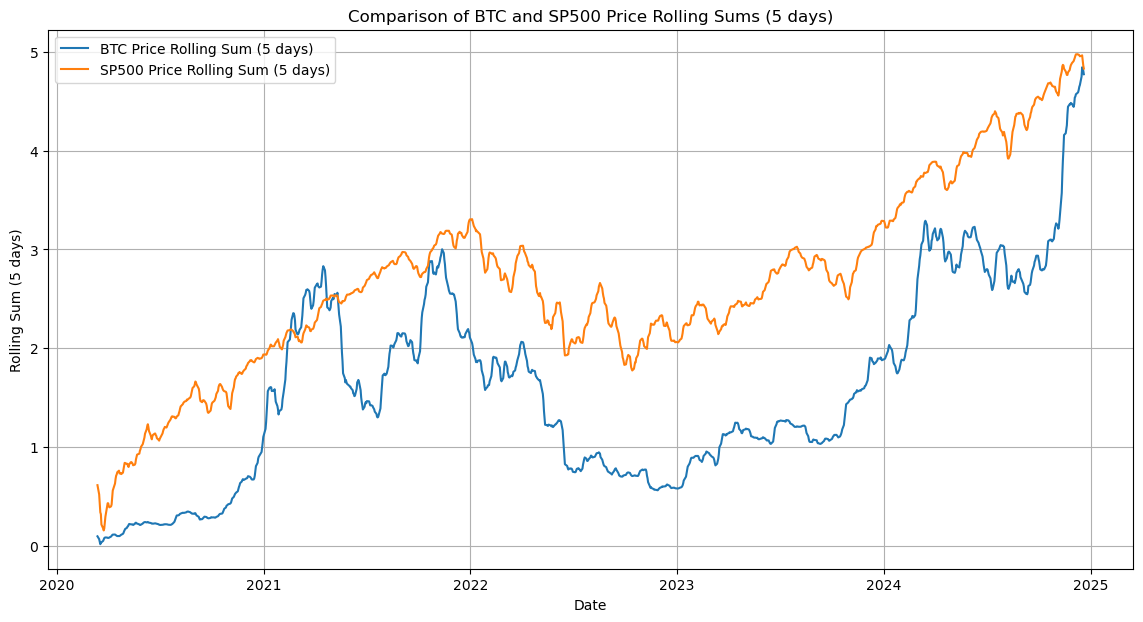

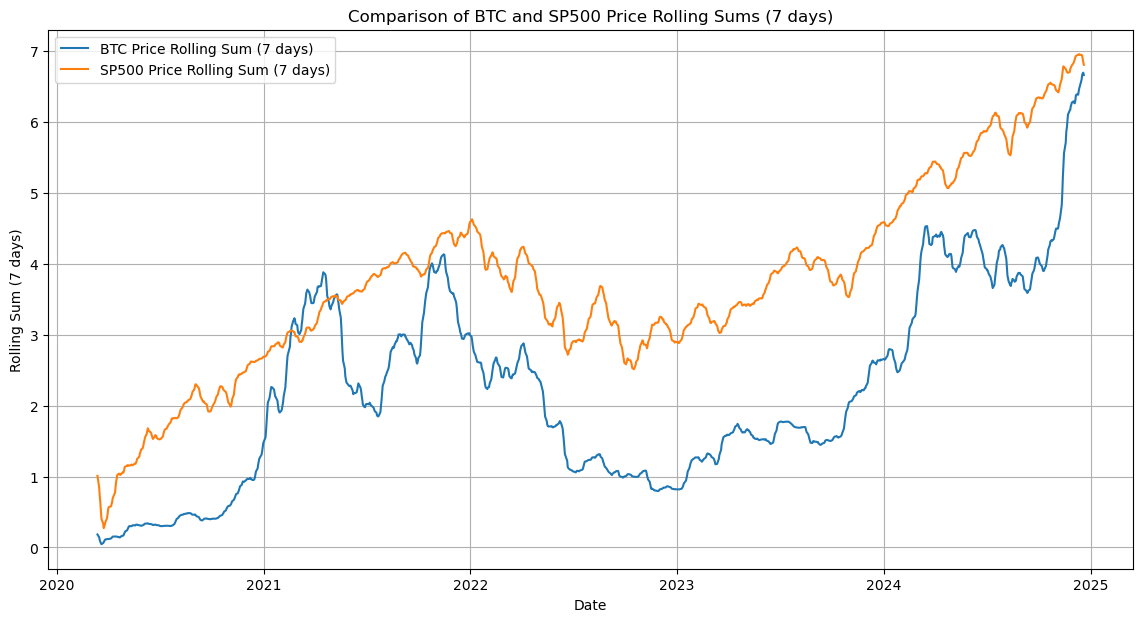

In [ ]:

def add_rolling_sum(df, windows: [], col):
    for window in windows:
        df[f'{col}_rolling_sum_{window}'] = df[col].rolling(window=window).sum()

    # Drop the rows with NaN values due to the rolling operation
    df.dropna(inplace=True)

def plot_rolling_sum_btc_price_sp500_price(df, windows):
    for window in windows:
         # Plot the rolling sums
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=df, x='Date', y=f'btc_price_scaled_rolling_sum_{window}', label=f'BTC Price Rolling Sum ({window} days)')
        sns.lineplot(data=df, x='Date', y=f'sp500_price_scaled_rolling_sum_{window}', label=f'SP500 Price Rolling Sum ({window} days)')
        
        plt.xlabel("Date")
        plt.ylabel(f"Rolling Sum ({window} days)")
        plt.title(f"Comparison of BTC and SP500 Price Rolling Sums ({window} days)")
        plt.legend()
        plt.grid(True)
        plt.show()

add_rolling_sum(df_btc_sp500, windows=[2,3,5,7], col='sp500_price_scaled')
add_rolling_sum(df_btc_sp500, windows=[2,3,5,7], col='btc_price_scaled')
plot_rolling_sum_btc_price_sp500_price(df_btc_sp500, windows=[2,3,5,7])


### Can I predict one stock proce knowing the past of the other ?
For semplicity:
* I use the rolling window, one of our iper-paramter is the window size, (rolling window size, window)
* I try to predict the price of the day after 'window-size' days, ( deleay )

#### Prepare the data, with 3 days

In [476]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select window size / forecast time
window_size = 3

# Prepare the data
df_btc_sp500['btc_price_scaled_shifted'] = df_btc_sp500['btc_price_scaled'].shift(window_size)
df_btc_sp500.dropna(inplace=True)

# Scale the cumulative sum features
df_btc_sp500['btc_price_cumsum_scaled'] = scaler_btc.fit_transform(df_btc_sp500['btc_price_cumsum'].values.reshape(-1, 1))
df_btc_sp500['sp500_price_cumsum_scaled'] = scaler_sp500.fit_transform(df_btc_sp500['sp500_price_cumsum'].values.reshape(-1, 1))

# Prepare the data using only scaled prices and scaled cumulative sum features
ignore_cols = ['Date', 'sp500_price', 'sp500_price_cumsum']
df_x = df_btc_sp500.drop(columns=ignore_cols, axis=1)

# Validation / Check for columns containing 'btc' and drop them
columns_to_drop = [col for col in df_x.columns if 'btc' in col]
df_x = df_x.drop(columns=columns_to_drop)

X = df_x.values
y = df_btc_sp500[y_col].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


### Linear regression

In [477]:

# Define the PyTorch model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = SimpleNN()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 300
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    train_outputs = model(X_train)
    train_loss = criterion(train_outputs, y_train)
    print(f'Train Loss: {train_loss.item():.4f}')

model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

# Make predictions
predictions = test_outputs.numpy()

# Calculate the mean squared error
lr_mse = mean_squared_error(y_test, predictions)
print(f'Linear Regression Test MSE: {rf_mse:.5f}')

lr_err_max = max_error(y_test, predictions)
print(f'Linear Regression Test Max error: {lr_err_max:.4f}')

lr_r2 = r2_score(y_test, predictions)
print(f'Linear Regression Test R2: {lr_r2:.4f}')


Epoch [10/300], Loss: 0.5359
Epoch [20/300], Loss: 0.1755
Epoch [30/300], Loss: 0.0590
Epoch [40/300], Loss: 0.0300
Epoch [50/300], Loss: 0.0253
Epoch [60/300], Loss: 0.0238
Epoch [70/300], Loss: 0.0221
Epoch [80/300], Loss: 0.0209
Epoch [90/300], Loss: 0.0206
Epoch [100/300], Loss: 0.0201
Epoch [110/300], Loss: 0.0197
Epoch [120/300], Loss: 0.0193
Epoch [130/300], Loss: 0.0189
Epoch [140/300], Loss: 0.0186
Epoch [150/300], Loss: 0.0182
Epoch [160/300], Loss: 0.0178
Epoch [170/300], Loss: 0.0174
Epoch [180/300], Loss: 0.0171
Epoch [190/300], Loss: 0.0168
Epoch [200/300], Loss: 0.0164
Epoch [210/300], Loss: 0.0161
Epoch [220/300], Loss: 0.0158
Epoch [230/300], Loss: 0.0155
Epoch [240/300], Loss: 0.0152
Epoch [250/300], Loss: 0.0150
Epoch [260/300], Loss: 0.0147
Epoch [270/300], Loss: 0.0145
Epoch [280/300], Loss: 0.0142
Epoch [290/300], Loss: 0.0140
Epoch [300/300], Loss: 0.0138
Train Loss: 0.0138
Test Loss: 0.0154
Linear Regression Test MSE: 0.00030
Linear Regression Test Max error: 0.

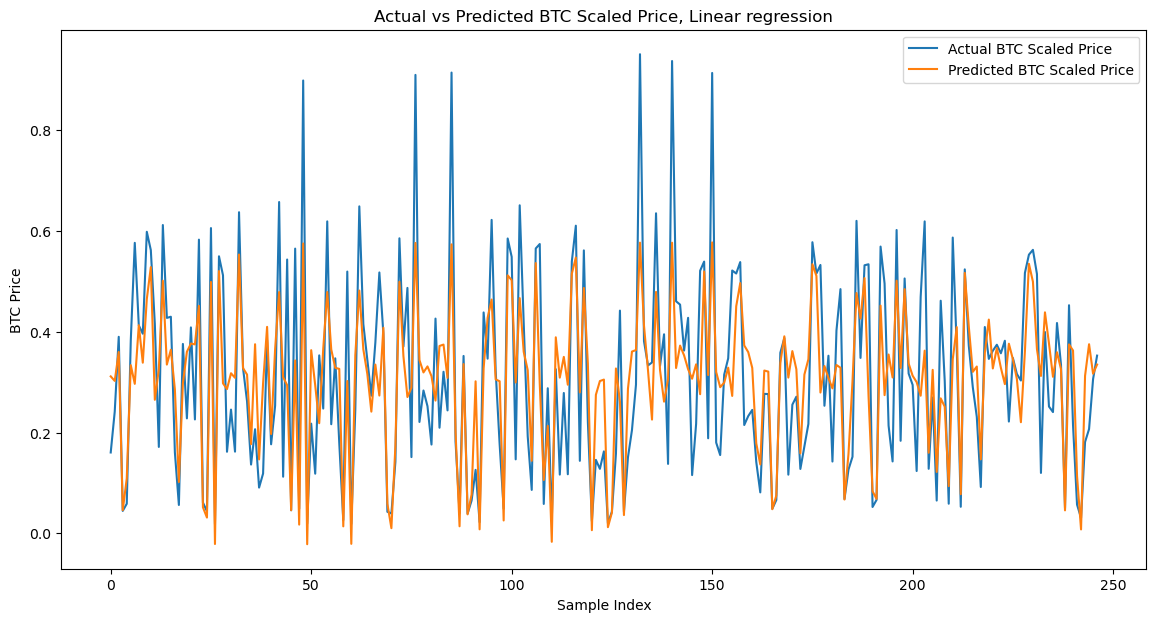

In [478]:
# Plot the predictions vs the actual prices
plt.figure(figsize=(14, 7))
plt.plot(y_test.numpy(), label='Actual BTC Scaled Price')
plt.plot(predictions, label='Predicted BTC Scaled Price')
plt.xlabel('Sample Index')
plt.ylabel('BTC Price')
plt.title('Actual vs Predicted BTC Scaled Price, Linear regression')
plt.legend()
plt.show()

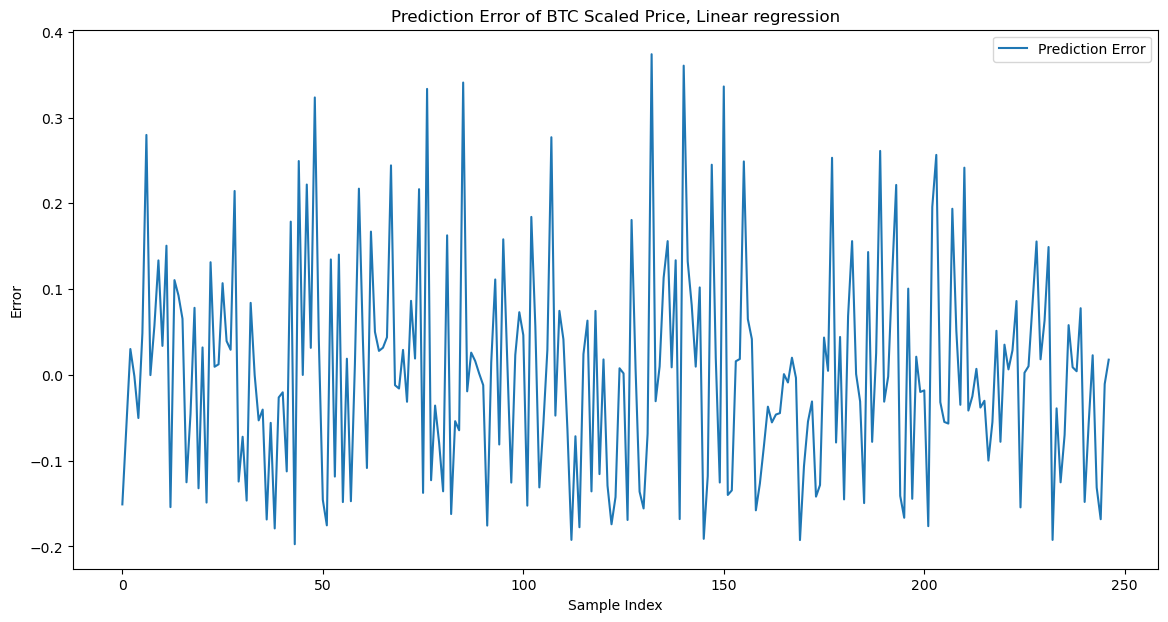

In [479]:
# Calculate the error
error = y_test.numpy() - predictions

# Plot the error
plt.figure(figsize=(14, 7))
plt.plot(error, label='Prediction Error')
plt.xlabel('Sample Index')
plt.ylabel('Error')
plt.title('Prediction Error of BTC Scaled Price, Linear regression')
plt.legend()
plt.show()

### Random forest model

In [480]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, max_error

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Train the model
rf_model.fit(X_train, y_train.ravel())

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate the mean squared error
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Test MSE: {rf_mse:.5f}')

rf_err_max = max_error(y_test, rf_predictions)
print(f'Random Forest Test Max error: {rf_err_max:.4f}')

rf_r2 = r2_score(y_test, rf_predictions)
print(f'Random Forest Test R2: {rf_r2:.4f}')



Random Forest Test MSE: 0.00030
Random Forest Test Max error: 0.0737
Random Forest Test R2: 0.9927


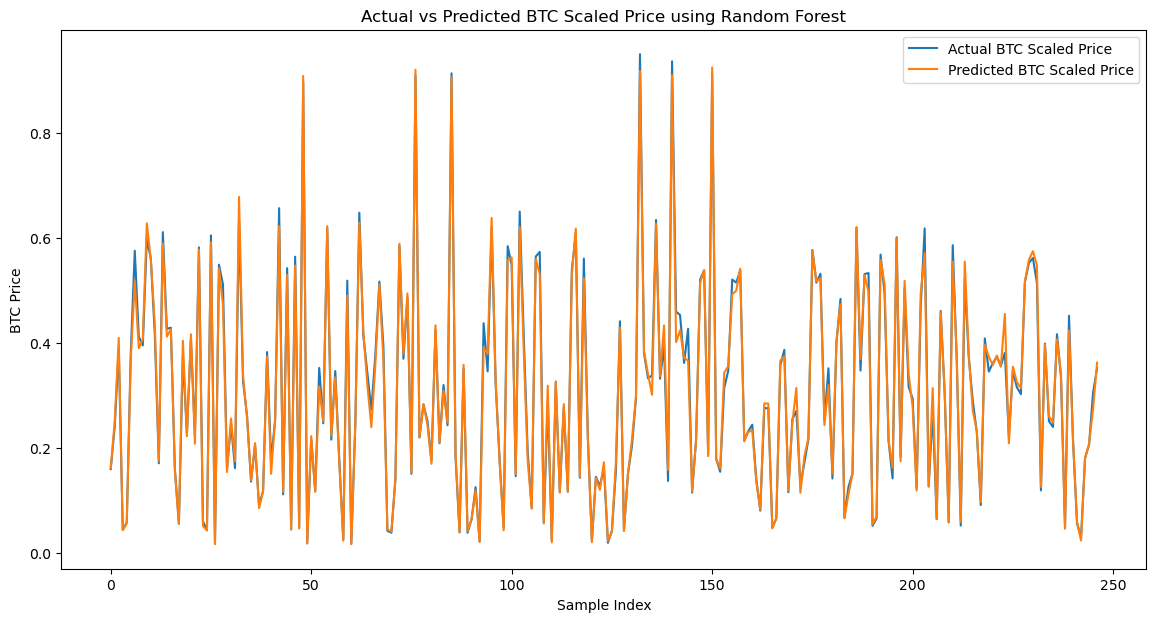

In [481]:
# Plot the predictions vs the actual prices
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual BTC Scaled Price')
plt.plot(rf_predictions, label='Predicted BTC Scaled Price')
plt.xlabel('Sample Index')
plt.ylabel('BTC Price')
plt.title('Actual vs Predicted BTC Scaled Price using Random Forest')
plt.legend()
plt.show()

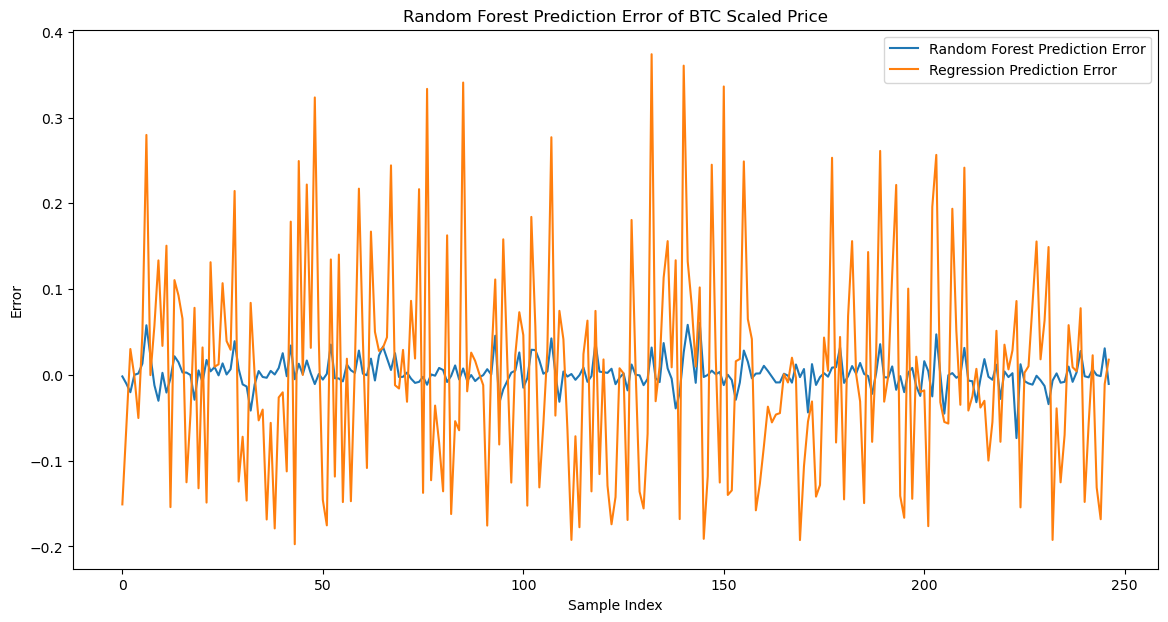

In [482]:

# Calculate the error for the random forest model
rf_predictions = torch.tensor(rf_predictions, dtype=torch.float32).view(-1, 1)
rf_error = y_test - rf_predictions

# Plot the error for the random forest model
plt.figure(figsize=(14, 7))
plt.plot(rf_error, label='Random Forest Prediction Error')
plt.plot(error, label='Regression Prediction Error')

plt.xlabel('Sample Index')
plt.ylabel('Error')
plt.title('Random Forest Prediction Error of BTC Scaled Price')
plt.legend()
plt.show()

## The predictor
The selected model is the one based on Random Forest, trained above.
To be able to use the predictor, we need to unscale the prediction

### Prepare the input data

In [ ]:
TODO

# Save the model
torch.save(model.state_dict(), 'lstm_model.pth')

# Save the scalers
with open('scaler_X.pkl', 'wb') as f:
    pickle.dump(scaler_X, f)
with open('scaler_y.pkl', 'wb') as f:
    pickle.dump(scaler_y, f)

print("Model and scalers saved successfully.")

In [551]:
# Input the csv file with historic data, like
# 

df_sp500_input = pd.read_csv("./input/data/20241223_S&P 500 Historical Data.csv") 

cols_to_keep = ['Price', 'Date']
# Filter cols
df_sp500_input = df_sp500_input[cols_to_keep]

df_sp500_input['Date'] = pd.to_datetime(df_sp500_input['Date'])
df_sp500_input['Price'] = usd_to_float(df_sp500_input, 'Price')

sp500_price_input = df_sp500_input['Price'].values.reshape(-1, 1)

# Scale prices
sp500_price_scaled_input = scaler_sp500.transform(sp500_price_input)

# sp500_price_scaled_col = ['sp500_price_scaled']
df_sp500_input['sp500_price_scaled'] = sp500_price_scaled_input



# Calculate the cumulative sum (integration) of the scaled prices
df_sp500_input['sp500_price_cumsum'] = df_btc_sp500[sp500_price_scaled_col].cumsum()
sp500_price_cumsum_input = df_sp500_input['sp500_price_cumsum'].values.reshape(-1, 1)
sp500_price_cumsum_scaled_input = scaler_sp500.transform(sp500_price_cumsum_input)
df_sp500_input['sp500_price_cumsum_scaled'] = sp500_price_cumsum_scaled_input

# Calculate the derivatives
df_sp500_input['sp500_price_derivative'] = df_sp500_input[sp500_price_scaled_col].diff()
df_sp500_input.dropna(inplace=True) # Drop the first row with NaN values due to the diff() operation

# Calculate rolling sums
add_rolling_sum(df_sp500_input, windows=[2,3,5,7], col=sp500_price_scaled_col)

# Ignore some cols 
ignore_cols_input = ['Date', 'Price', 'sp500_price_cumsum']
df_x_input = df_sp500_input.drop(columns=ignore_cols_input, axis=1)

X_vals_input = df_x.values

# Convert data to PyTorch tensors
X_input = torch.tensor(X_vals_input, dtype=torch.float32)


(1235,)
torch.Size([247, 1])


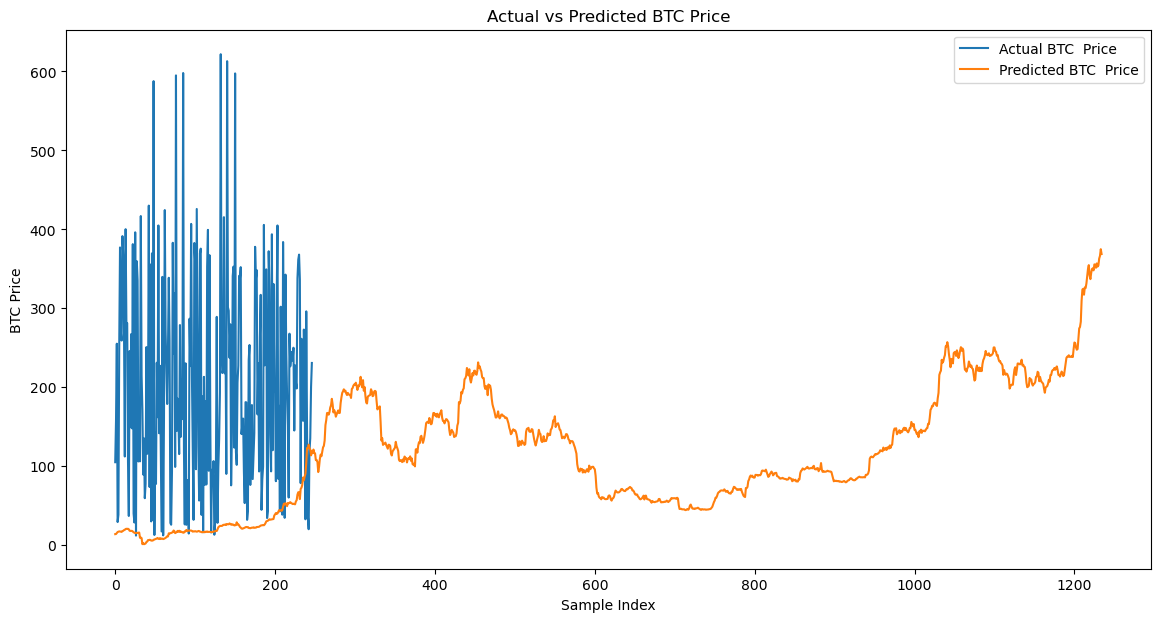

In [554]:
rf_predictions_from_new_input = rf_model.predict(X_input)

print(rf_predictions_from_new_input.shape)

rf_predictions_unscaled_new_input = scaler_btc.inverse_transform(rf_predictions_from_new_input.reshape(-1, 1))

# Verify using initial data
y_test_unscaled = scaler_sp500.inverse_transform(y_test)

print(y_test.shape)

# Plot the predictions vs the actual unscaled prices
plt.figure(figsize=(14, 7))
plt.plot(y_test_unscaled, label='Actual BTC  Price')
plt.plot(rf_predictions_unscaled_new_input, label='Predicted BTC  Price')
plt.xlabel('Sample Index')
plt.ylabel('BTC Price')
plt.title('Actual vs Predicted BTC Price')
plt.legend()
plt.show()
